In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from time import time


In [37]:
import sys
sys.executable

tensorboard = TensorBoard(log_dir="tflogs/{}".format(time()))

In [38]:
datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_dir = 'dataset/training_set/'
validation_dir = 'dataset/test_set/'
test_dir = 'dataset/test_set/'

image_w = 128
image_h = 128

In [40]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size= (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [41]:
validation_generator = datagen.flow_from_directory(validation_dir,
                                                  target_size = (image_w, image_h),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [42]:
def LeNet(width, height, channels, output):
    model = Sequential()
        
    #Convolution
    model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels)))
    
    #ReLU
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    # Convolution
    model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2)))
    
    #ReLU
    model.add(Activation('relu'))
    
    # Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(100))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output, activation='softmax'))
    
    return model

In [43]:
EPOCH = 20
train_samples = train_generator.samples
validation_samples = validation_generator.samples
batch_size = train_generator.batch_size

In [44]:
model = LeNet(image_w, image_h, 3, 2)

model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        2432      
_________________________________________________________________
activation_10 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_11 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
__________

In [45]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = train_samples // batch_size,
                    epochs = EPOCH,
                    validation_data = validation_generator,
                    validation_steps = validation_samples // batch_size,
                    callbacks=[tensorboard])

Epoch 1/20
250/250 [==============================] - 59s 235ms/step - loss: 0.2384 - acc: 0.5881 - val_loss: 0.2068 - val_acc: 0.6739
Epoch 2/20
250/250 [==============================] - 61s 245ms/step - loss: 0.1980 - acc: 0.6960 - val_loss: 0.1901 - val_acc: 0.7231
Epoch 3/20
250/250 [==============================] - 61s 245ms/step - loss: 0.1760 - acc: 0.7372 - val_loss: 0.1810 - val_acc: 0.7312
Epoch 4/20
250/250 [==============================] - 62s 247ms/step - loss: 0.1552 - acc: 0.7751 - val_loss: 0.1684 - val_acc: 0.7485
Epoch 5/20
250/250 [==============================] - 66s 265ms/step - loss: 0.1373 - acc: 0.8054 - val_loss: 0.1635 - val_acc: 0.7693
Epoch 6/20
250/250 [==============================] - 61s 244ms/step - loss: 0.1151 - acc: 0.8430 - val_loss: 0.1791 - val_acc: 0.7464
Epoch 7/20
250/250 [==============================] - 66s 263ms/step - loss: 0.0968 - acc: 0.8680 - val_loss: 0.1722 - val_acc: 0.7647
Epoch 8/20
250/250 [==============================] - 6

In [46]:
model_save_dir = 'models/'
model_save_path = model_save_dir+'cat_dog_cnn.h5'

In [47]:
model.save_weights(model_save_path)

In [48]:
model.load_weights(model_save_path)

In [49]:
img = load_img('dataset/training_set/cats/cat.1.jpg', target_size=(128, 128))

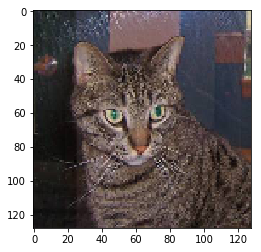

In [50]:
plt.imshow(img)
plt.show()

In [51]:
img = np.array(img)/255.

img = np.expand_dims(img, axis=0)

In [52]:
model.predict(img)

array([[ 0.99770552,  0.00229453]], dtype=float32)

In [53]:
img = load_img('dataset/training_set/dogs/dog.1.jpg', target_size=(128, 128))

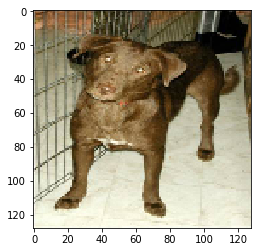

In [54]:
plt.imshow(img)
plt.show()


In [55]:
img = np.array(img)/255.

img = np.expand_dims(img, axis=0)

In [56]:
model.predict(img)

array([[  4.92207728e-05,   9.99950767e-01]], dtype=float32)